# **Unsupervised Learning - Categorising Countries based on socio-economic factors using KMeans Clustering**



**Aim**:

To create clusters of countries based on their socio-economic factors to help decide where financial aid need to be allocated.

## **Variable Description**:

* **country** : Name of country
* **child_mort** : Death of children under 5 years of age per 1000 live births
*   **exports** : Exports of goods and services per capita. Given as % of the GDP per capita
*   **health** : Total health spending per capita. Given as % of GDP per capita
*   **imports** : Imports of goods and services per capita. Given as % of the GDP per capita
*   **Income** : Net income per person
*   **Inflation** : The measurement of the annual growth rate of the Total GDP
*   **life_expec** : The average number of years a new born child would live if the current mortality patterns are to remain the same.
*   **total_fer** : The number of children that would be born to each woman if the current age-fertility rates remain the same.
*   **gdpp** : The GDP per capita. Calculated as the Total GDP divided by the total population.















In [61]:
# Importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading in the data
country = pd.read_csv('/content/sample_data/Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# **Exploratory Data Analysis**

In [7]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
country.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

* There are no null values in the data.

In [10]:
country.duplicated().sum()

0

- There are now duplicate rows.

#### **Checking correlation between the numerical variables**

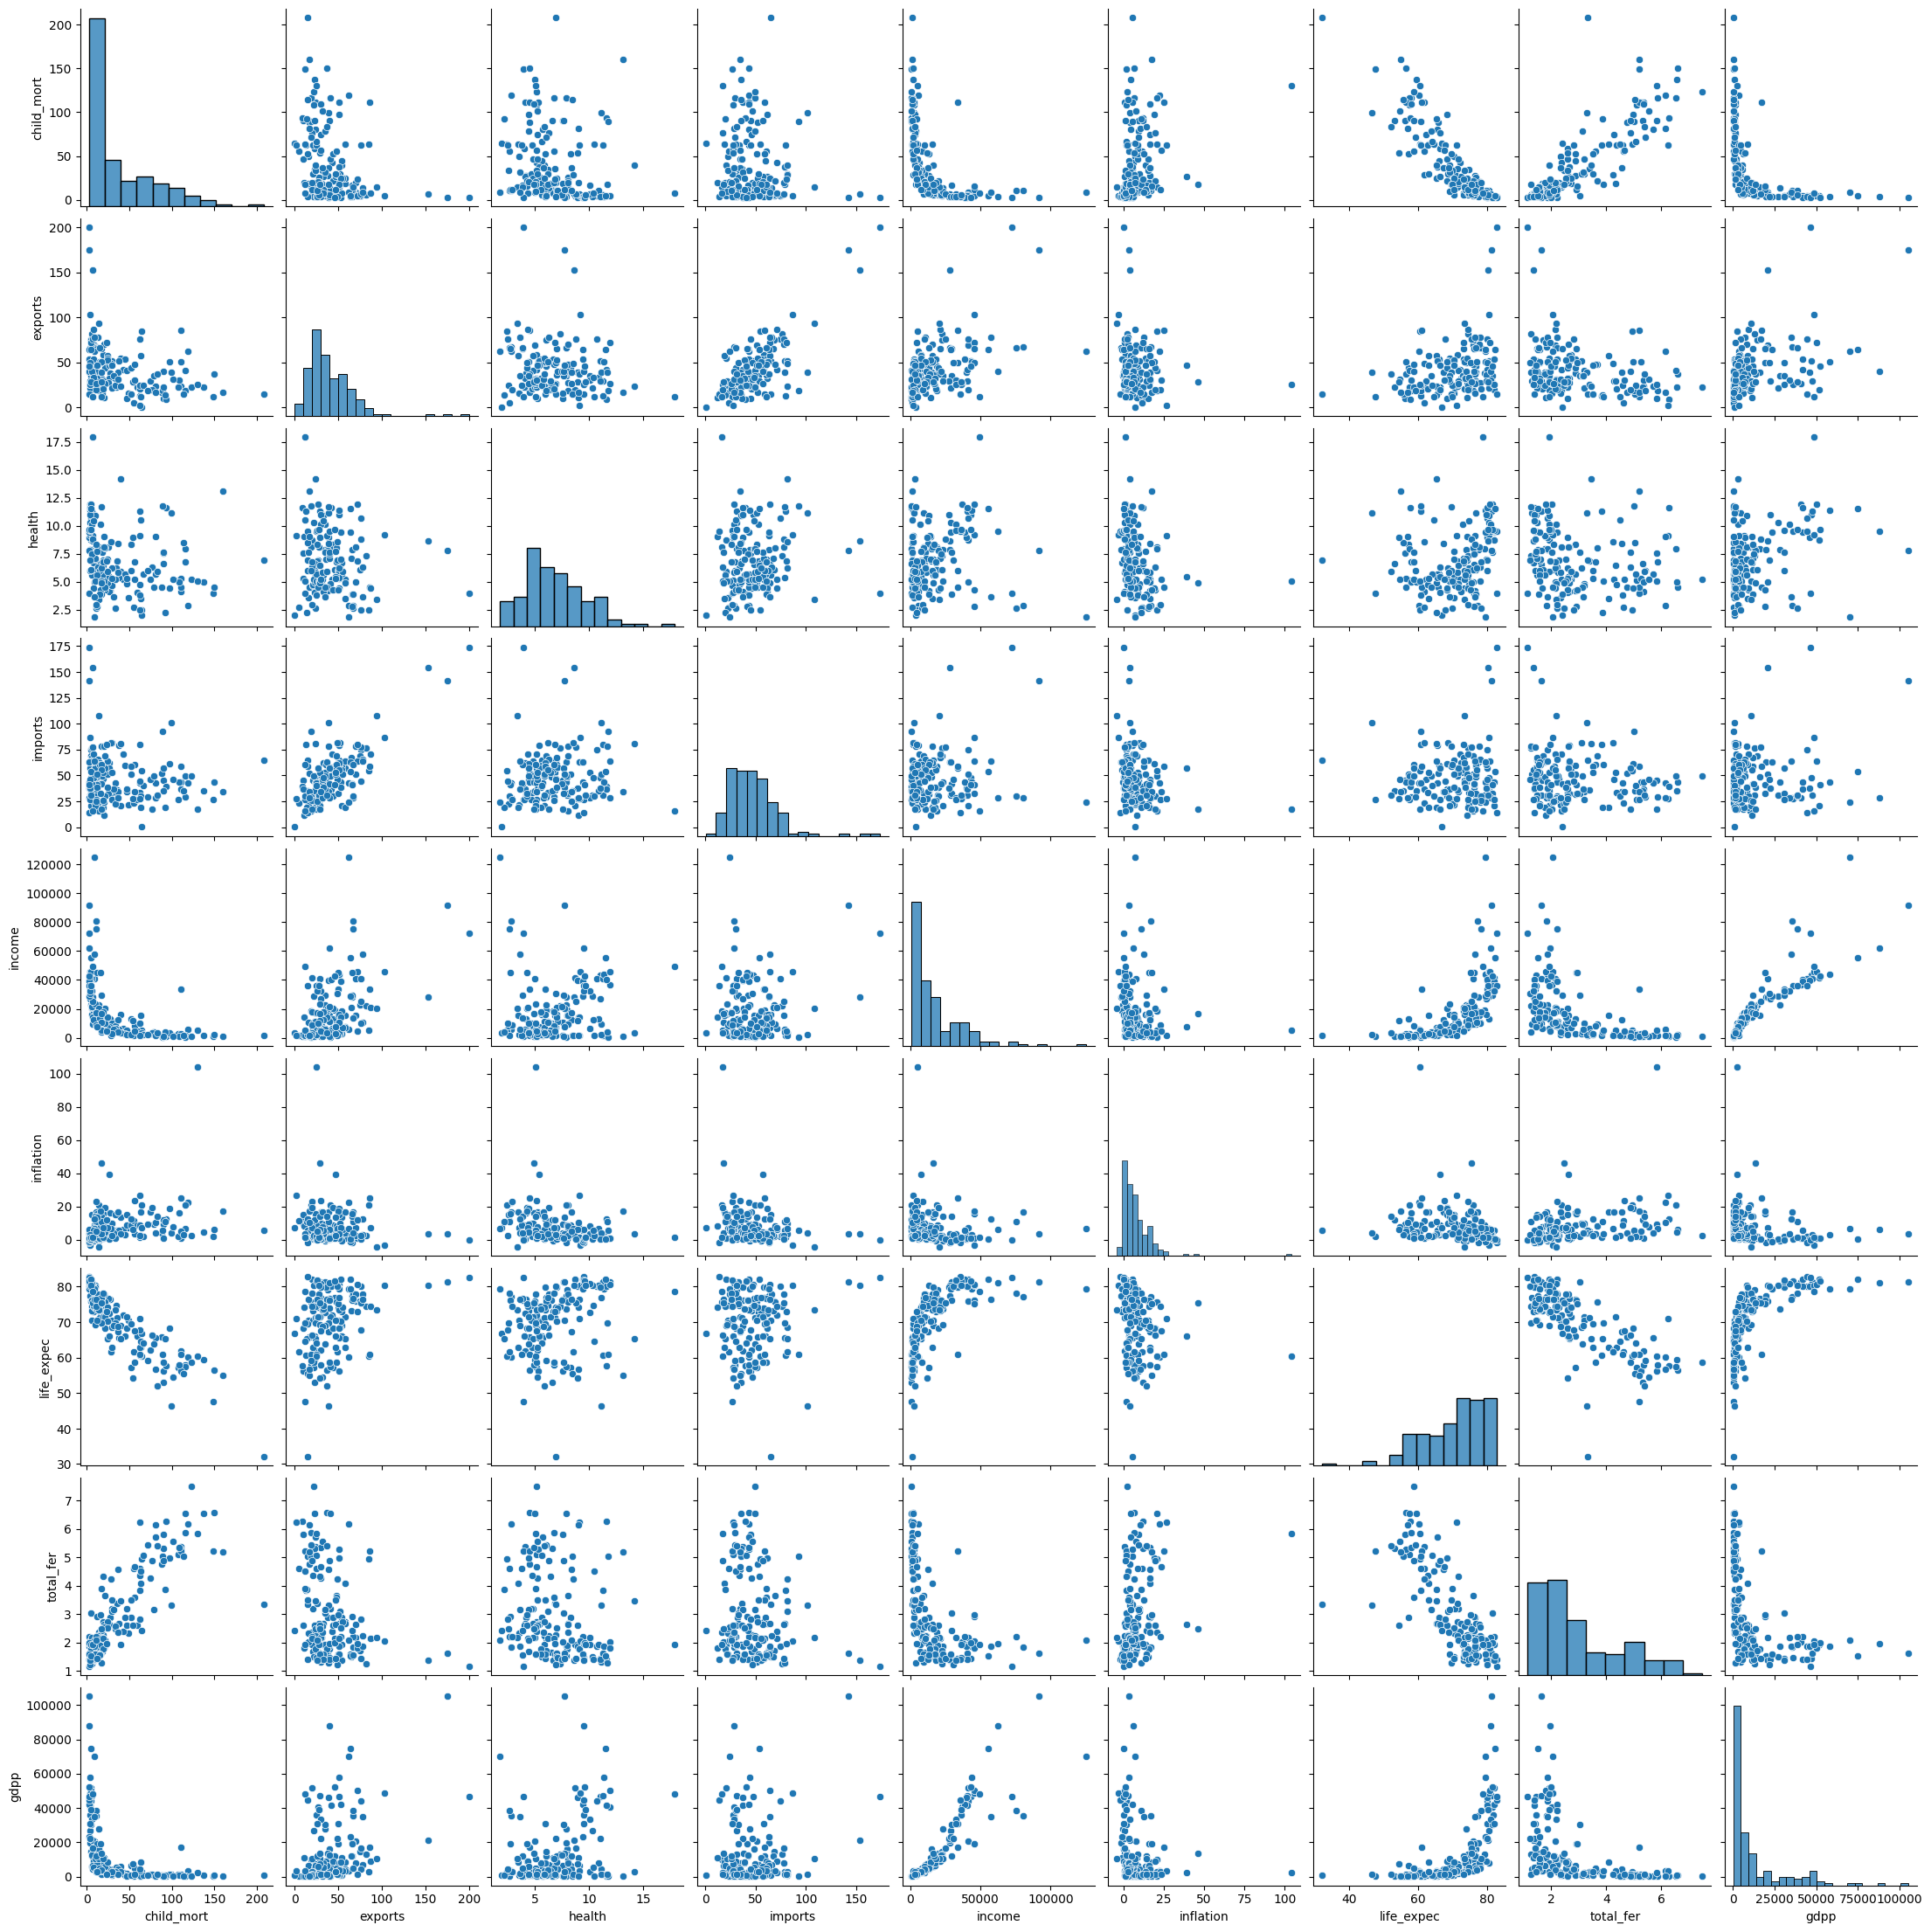

In [11]:
sns.pairplot(country)
plt.show()

In [12]:
cols = list(country.columns)
cols

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [13]:
numerical_cols = cols[1:]
categorical_cols = ['country']

In [14]:
print(numerical_cols)

['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


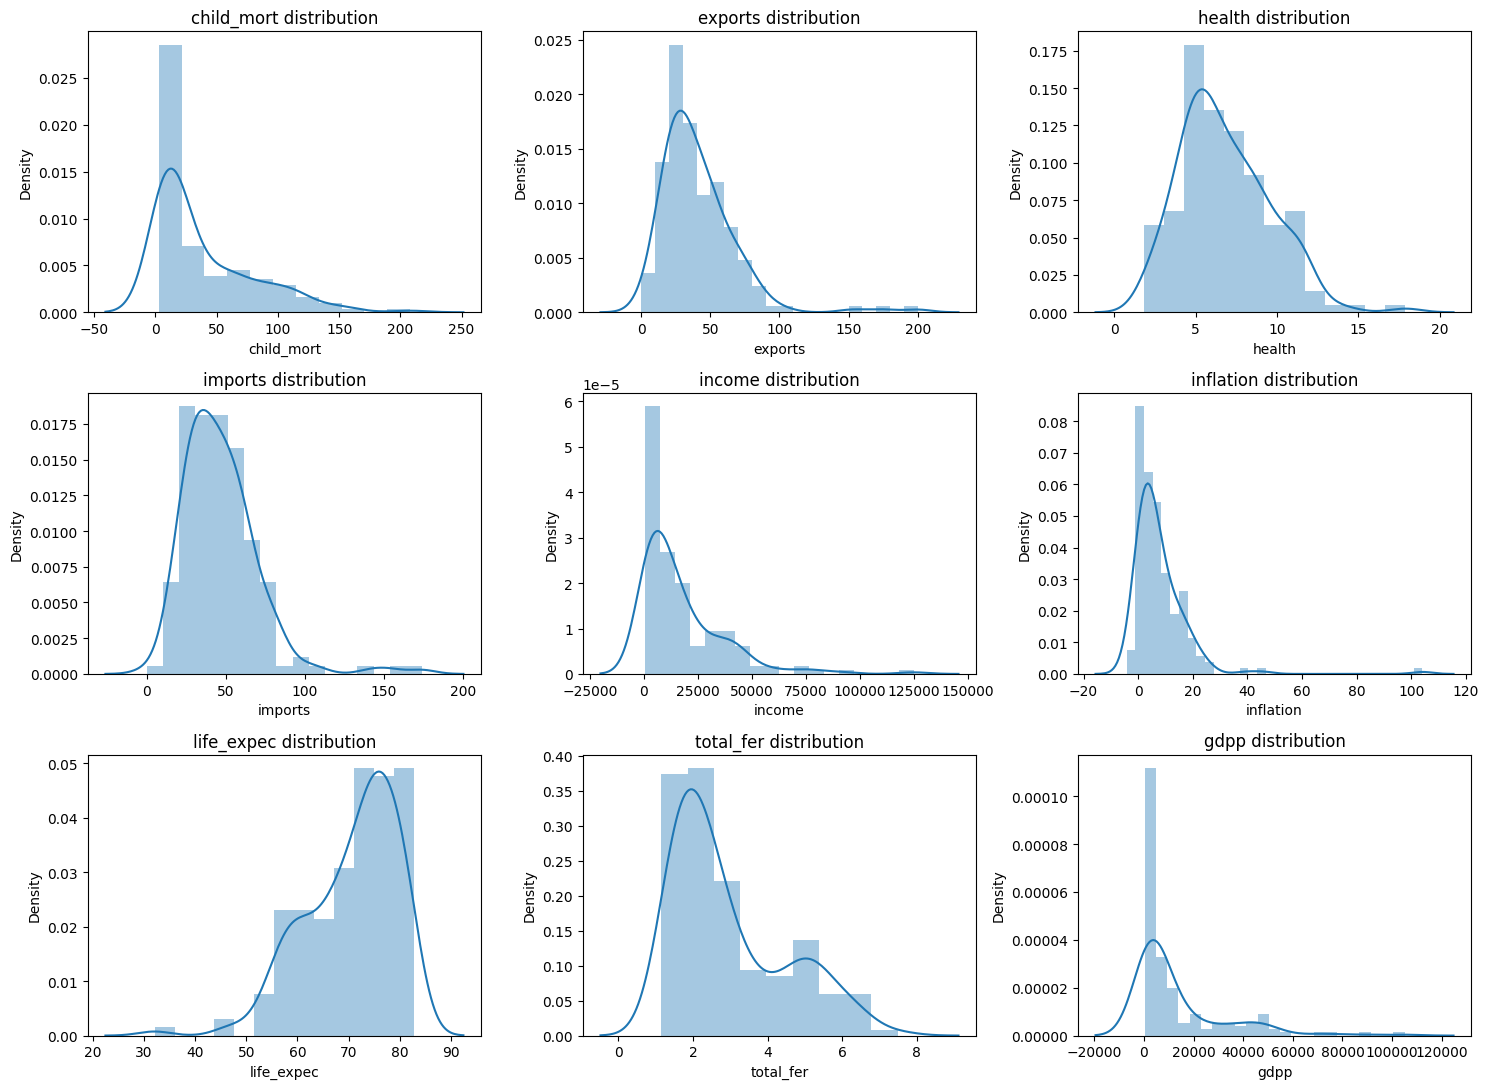

In [15]:
# Check Distribution of the numerical variables listed above
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,11))
for i in range(len(numerical_cols)):
  plt.subplot(3,3,i+1)
  sns.distplot(country[numerical_cols[i]])
  title = numerical_cols[i] + ' distribution'
  plt.title(title)
plt.tight_layout()
plt.show()

Key takeaways from the Distribution Plots

- Life expectancy distribution is negatively skewed. Health expenditure has an approximately normal distribution. All distributions except Life Expectancy show close to positive skewness.

# **Visualizing Key variables**

#### GDP per capita

In [24]:
# Categories for visualization
catog = ['High', 'Medium', 'Low']

In [25]:
# Function to plot each feature vs country for the three categories - High, Medium and Low
def plots_catogs(feature, ttl_text, subplt_ttl):
  """
  Arguments:
  feature - Feature/variable considered for plotting (Example - income, gdpp, health, child_mort etc.)
  ttl_text - Main title for the subplots
  This function takes in the feature name as the argument and creates three plots for each High, Medium and Low category for that particular feature passed.
  """
  fig, ax = plt.subplots(1,3,figsize = (17,5))
  sns.barplot(x = 'country', y = feature, data = country.sort_values(by = feature, ascending = False).iloc[:5], ax = ax[0])
  sns.barplot(x = 'country', y = feature, data = country.sort_values(by = feature, ascending = False).iloc[81:86], ax = ax[1])
  sns.barplot(x = 'country', y = feature, data = country.sort_values(by = feature, ascending = False).iloc[-5:], ax = ax[2])
  for i in range(3):
    title = catog[i] + ' ' + subplt_ttl
    ax[i].set_title(title)
    ax[i].tick_params(axis='x', labelrotation = 45)
  fig.suptitle(ttl_text, fontsize = 18)

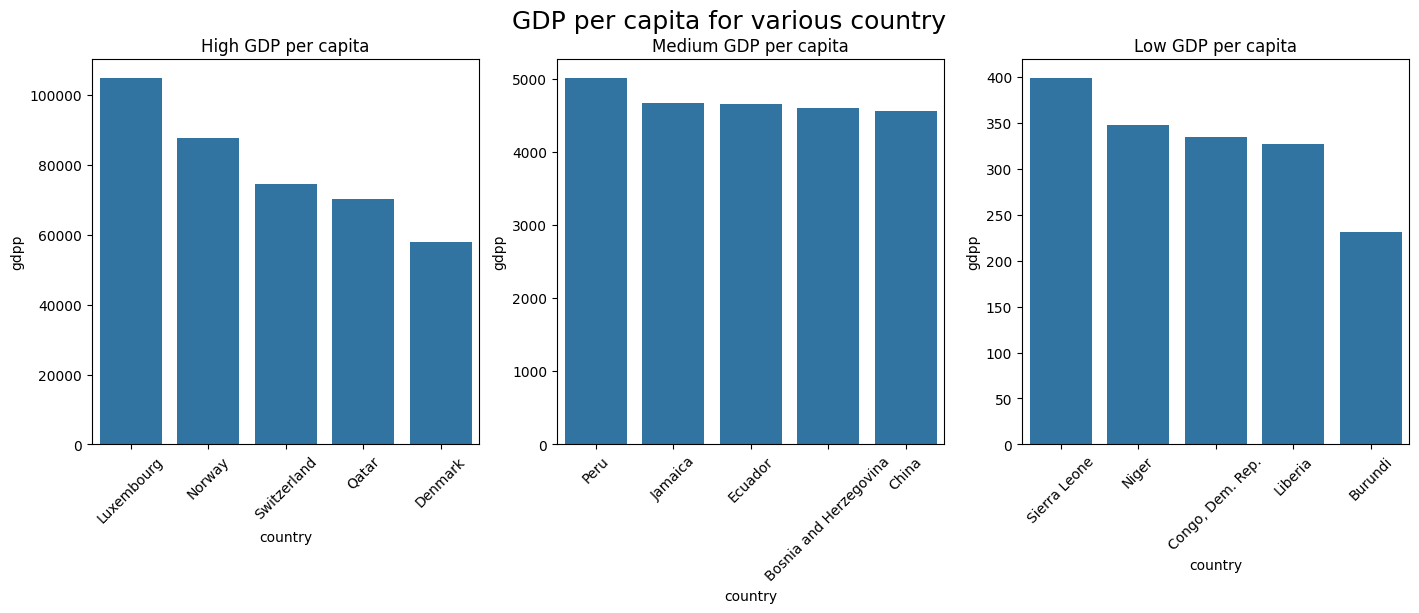

In [26]:
title = 'GDP per capita for various country'
plots_catogs('gdpp', title, 'GDP per capita')
plt.show()

## Income: Net Income per person

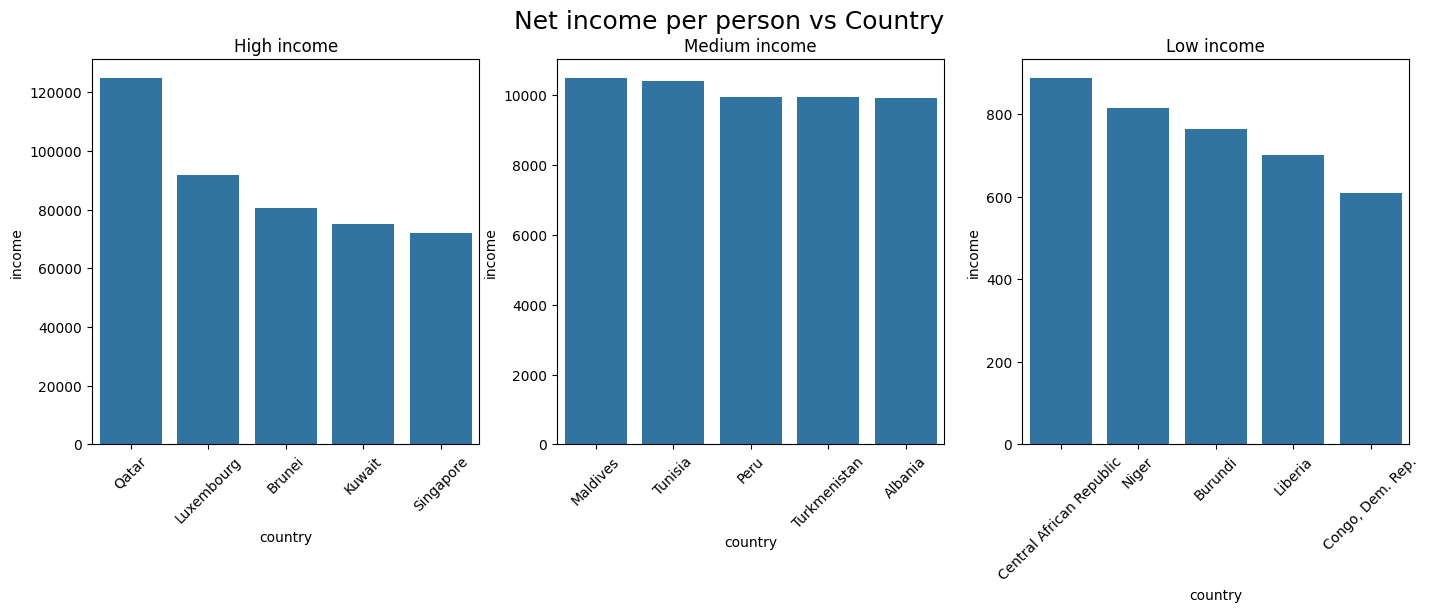

In [27]:
title = 'Net income per person vs Country'
plots_catogs('income', title, 'income')
plt.show()

## Health expenditure

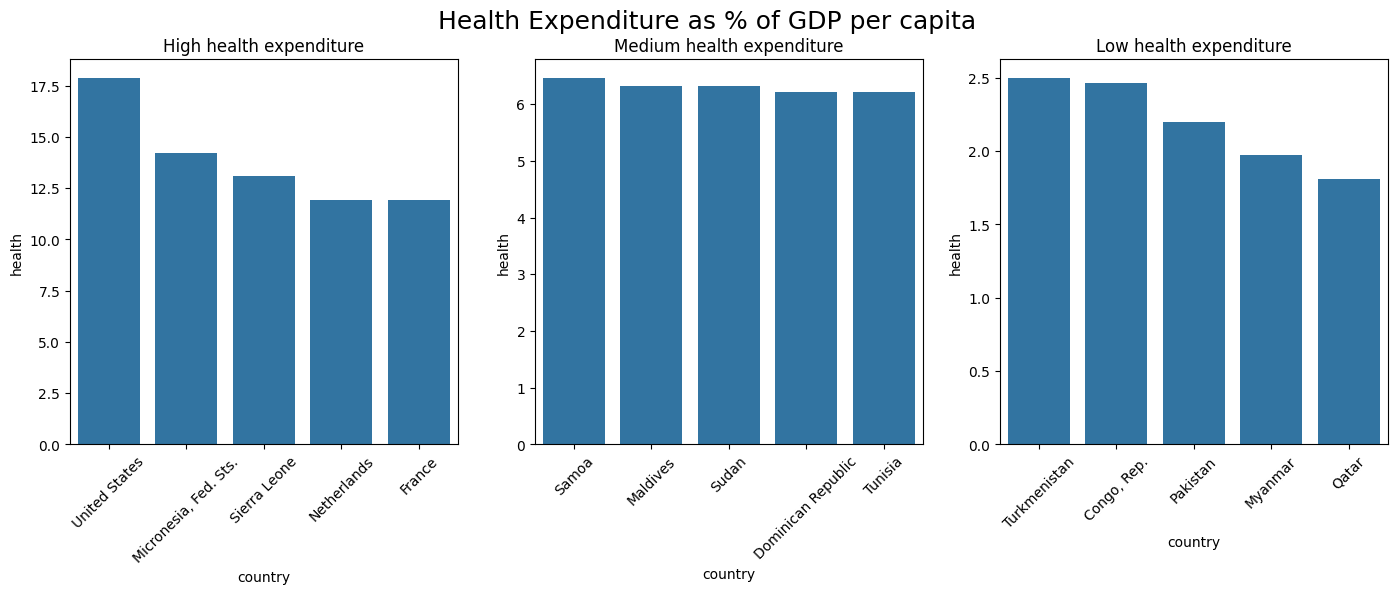

In [28]:
title = 'Health Expenditure as % of GDP per capita'
plots_catogs('health', title, 'health expenditure')
plt.show()

## Life Expectancy

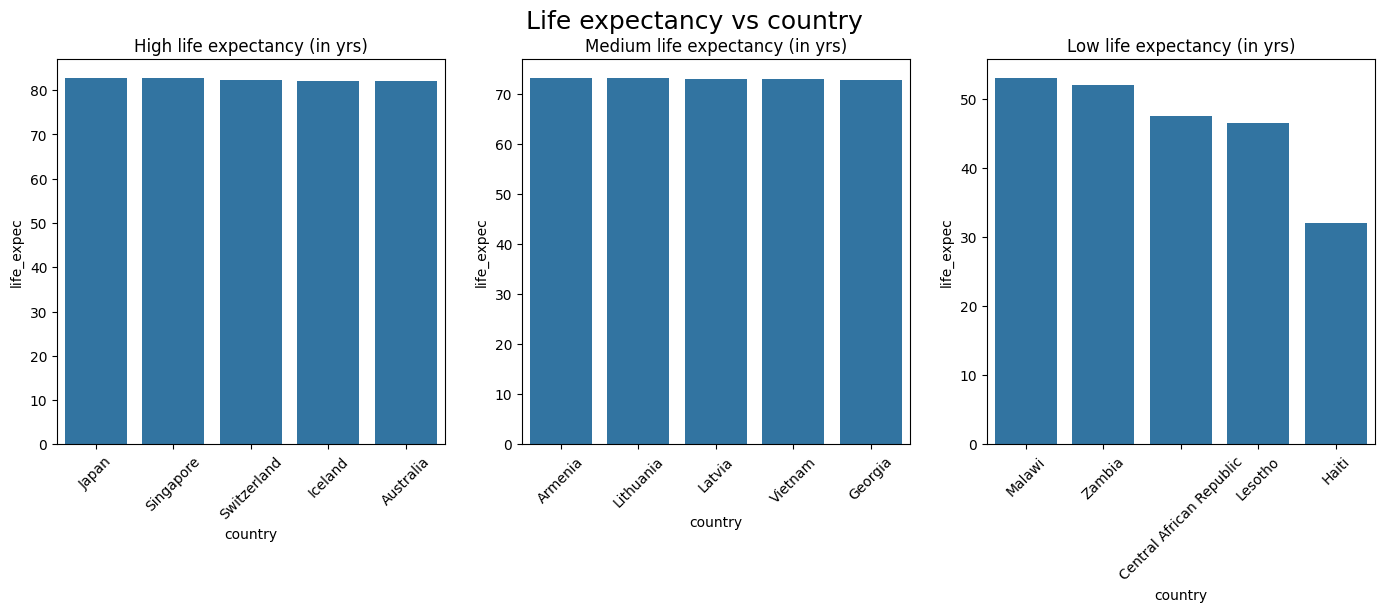

In [29]:
title = 'Life expectancy vs country'
plots_catogs('life_expec', title, 'life expectancy (in yrs)')
plt.show()

## Child mortality rate

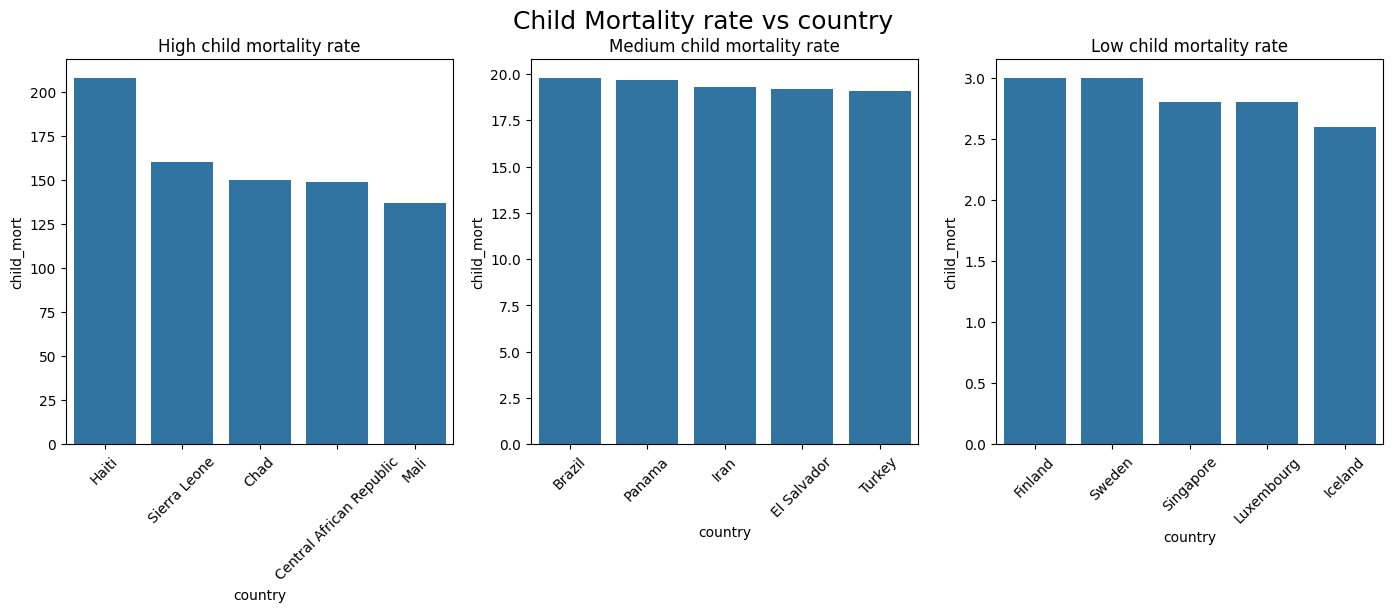

In [30]:
title = 'Child Mortality rate vs country'
plots_catogs('child_mort', title, 'child mortality rate')
plt.show()

## Exports of goods and services as % of GDP per capita

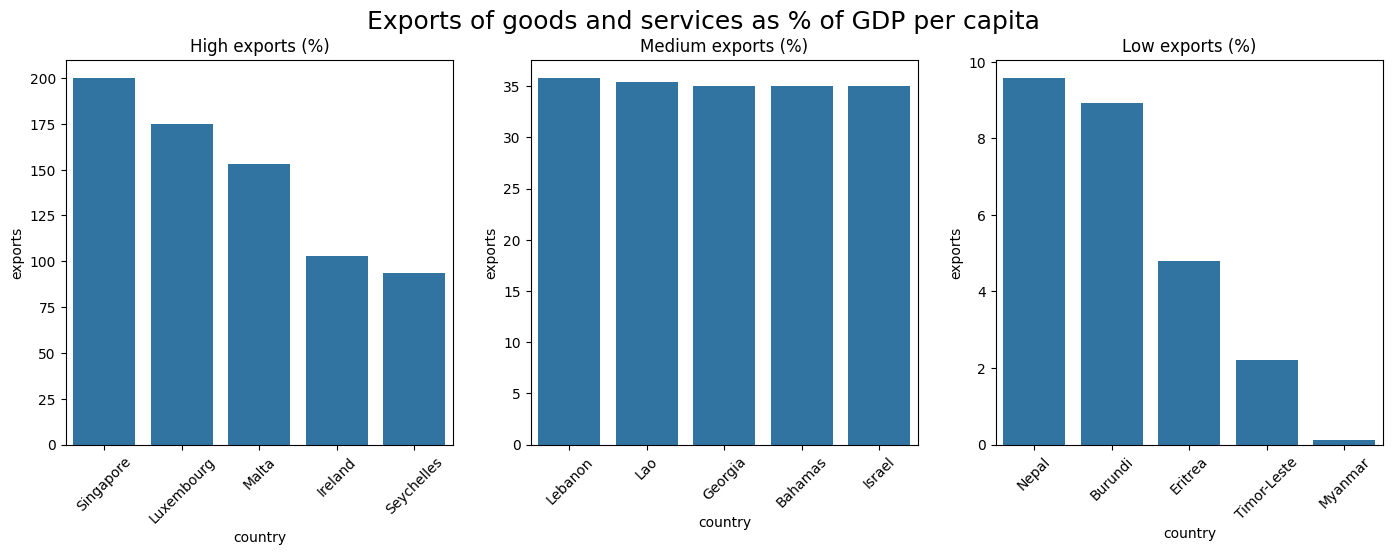

In [31]:
title = 'Exports of goods and services as % of GDP per capita'
plots_catogs('exports', title, 'exports (%)')
plt.show()

## Imports of goods and services as % of GDP per capita

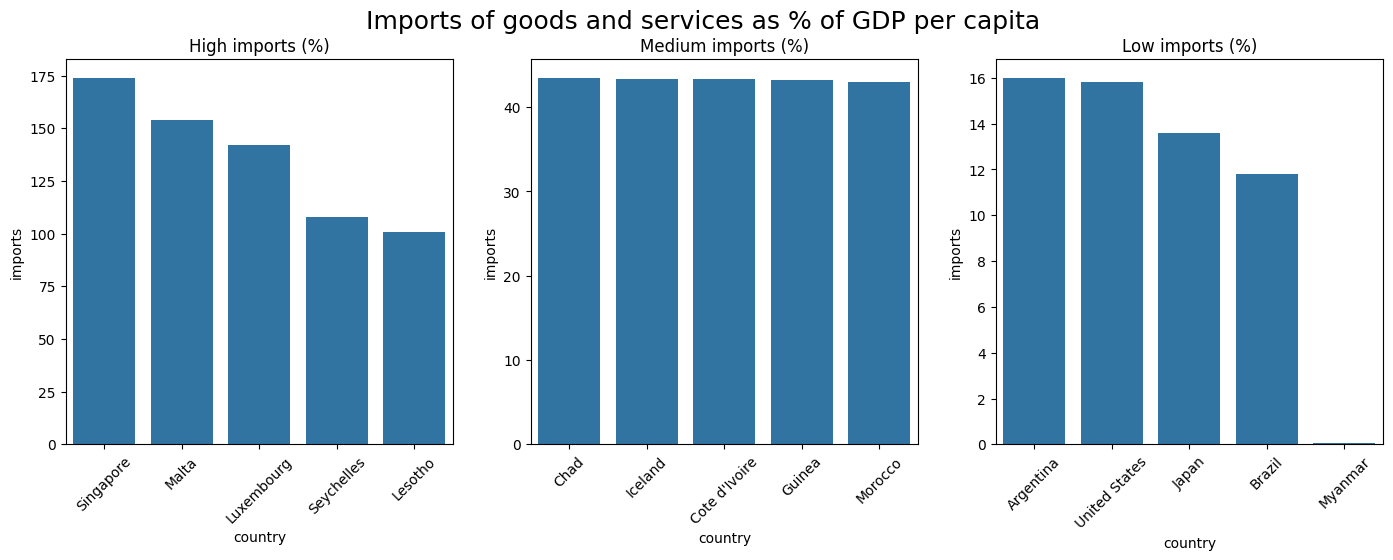

In [32]:
title = 'Imports of goods and services as % of GDP per capita'
plots_catogs('imports', title, 'imports (%)')
plt.show()

## Total fertility rate

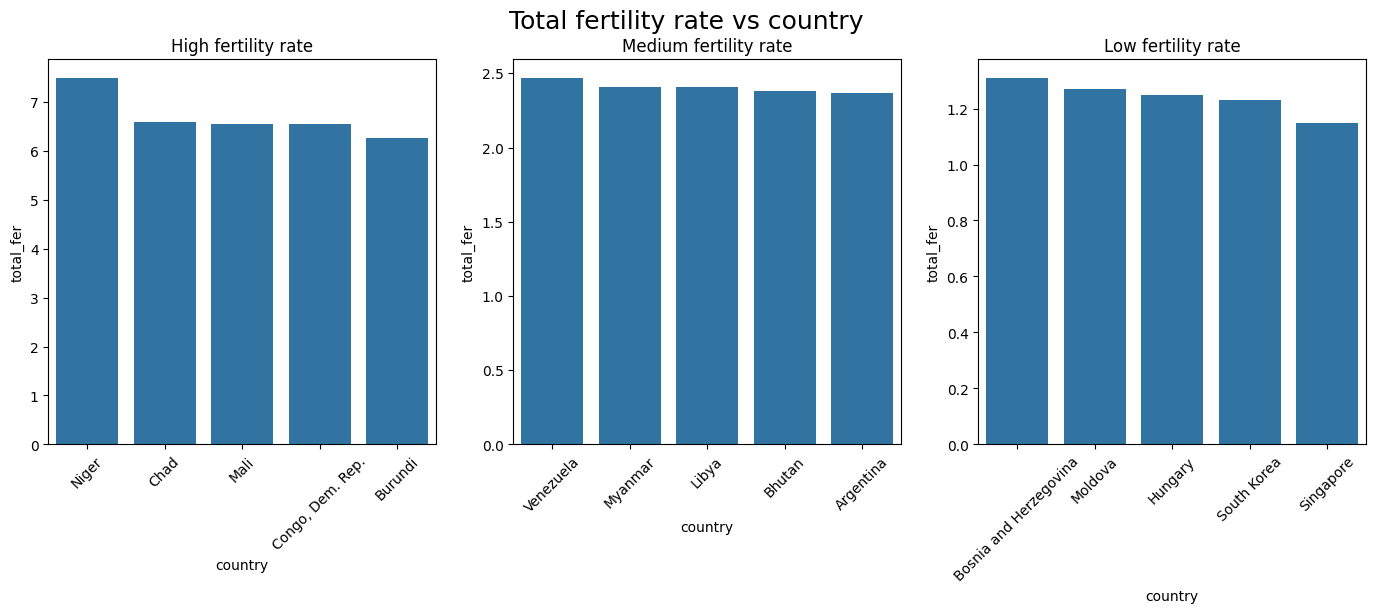

In [33]:
title = 'Total fertility rate vs country'
plots_catogs('total_fer', title, 'fertility rate')
plt.show()

## Inflation

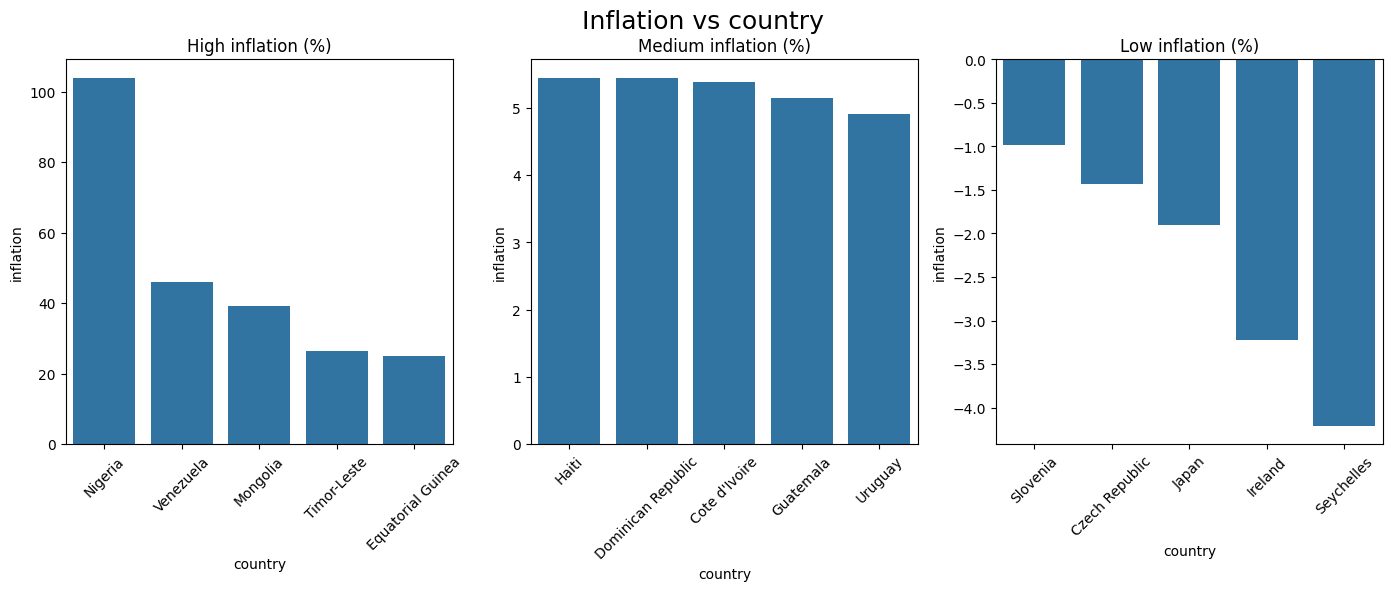

In [34]:
title = 'Inflation vs country'
plots_catogs('inflation', title, 'inflation (%)')
plt.show()

# **Summary of EDA**

- Singapore, Malta and Luxembourg are in the top 5 countries for Imports and Exports of goods and services. Singapore, specifically shows a trade surplus.
- Majority of countries having high child mortality and fertility rates come from Africa.
- In healthcare spending, the United States lead with 18% of its GDP invested in healthcare. On the other hand, countries in Asia/Middle East invested only a maximum of 2.5% of their GDP towards healthcare.
- In GDP per capita growth rates, majority of the countries at the top end are in Europe with Luxembourg leading at $120000. Qatar is the only Asian country in this list.


# **Checking outliers**

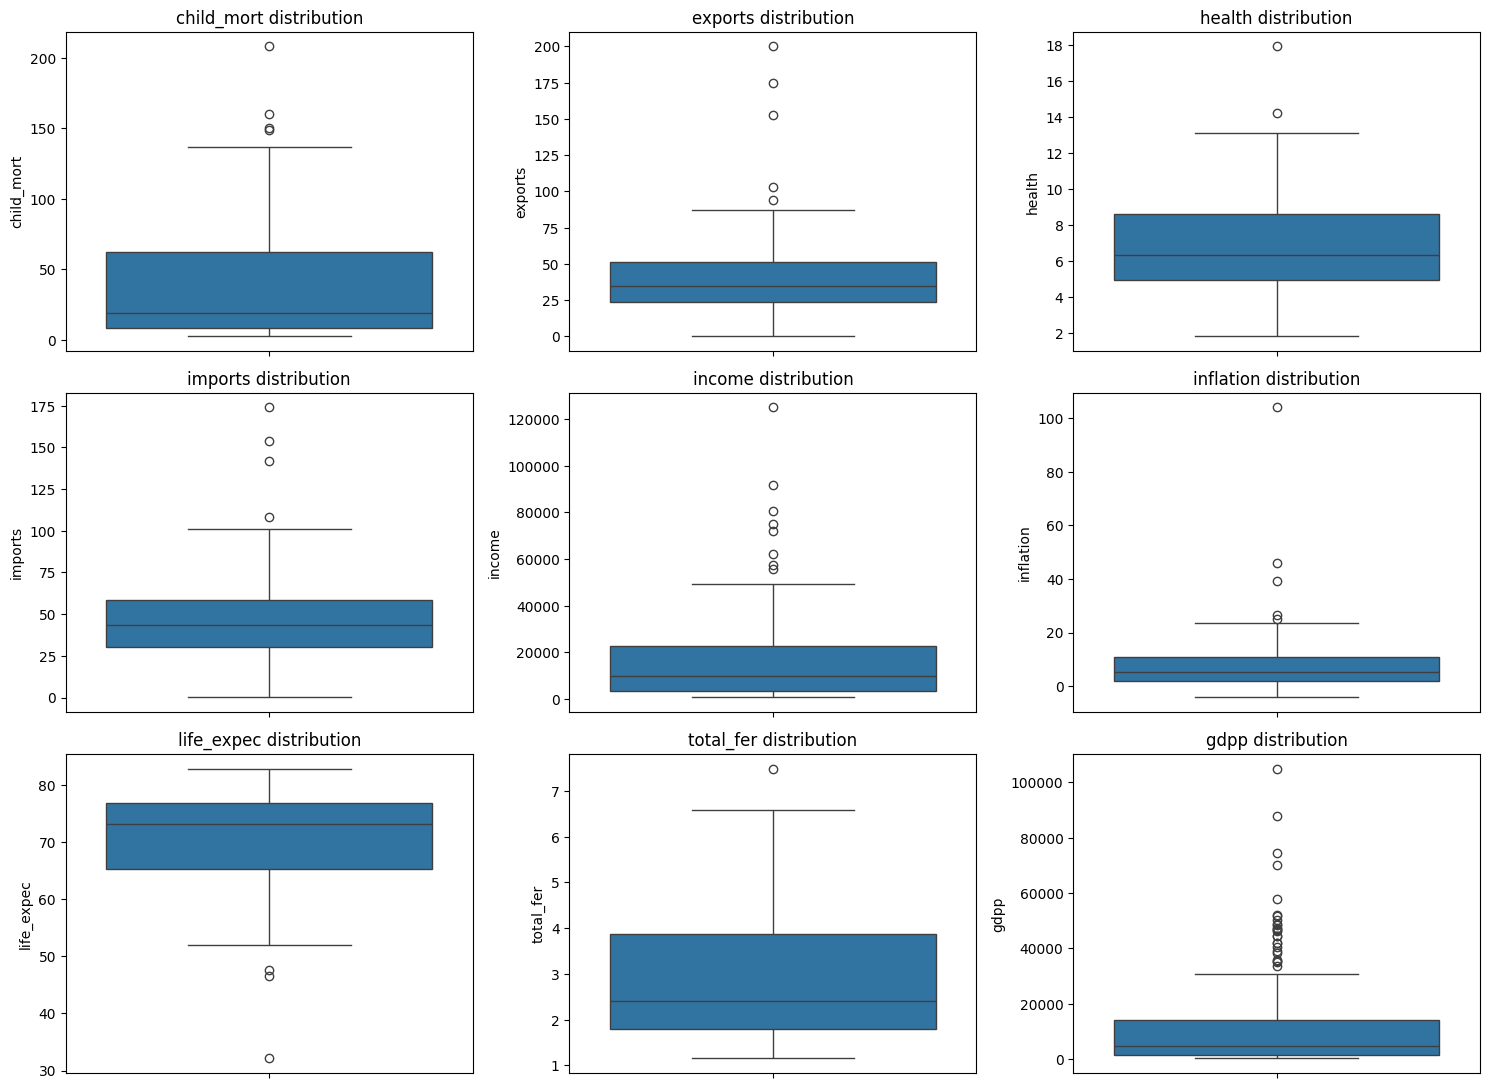

In [36]:
# boxplots
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,11))
for i in range(len(numerical_cols)):
  plt.subplot(3,3,i+1)
  sns.boxplot(country[numerical_cols[i]])
  title = numerical_cols[i] + ' distribution'
  plt.title(title)
plt.tight_layout()
plt.show()

### Dealing with outliers using the 'gdpp' column

In [38]:
# Suppressing the outliers
indexes = np.where(country['gdpp']>32000)
print('Number of outliers for gdpp = ', len(indexes[0]))
# display(country_data.iloc[indexes[0],:].sort_values('gdpp', ascending = True))

Number of outliers for gdpp =  25


In [39]:
# Dropping the rows containing outliers in 'gdpp'
country.drop(indexes[0], axis = 0, inplace = True)
country.shape

(142, 10)

# **Scaling the data**

In [40]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,142.000000,142.000000,142.000000,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000
mean,44.112676,37.970415,6.424014,46.598351,10935.65493,8.599683,68.806338,3.149014,6340.943662
std,41.038923,21.839432,2.369044,21.142601,9895.15270,11.112812,8.490539,1.553241,7110.006849
min,3.200000,0.109000,1.970000,0.065900,609.00000,-4.210000,32.100000,1.230000,231.000000
25%,13.900000,22.800000,4.872500,31.325000,2715.00000,2.342500,62.825000,1.890000,1205.000000
50%,26.300000,33.050000,5.990000,44.100000,7940.00000,5.935000,70.450000,2.630000,3575.000000
75%,63.850000,50.200000,7.887500,58.825000,16150.00000,11.975000,75.475000,4.475000,8637.500000
max,208.000000,153.000000,14.200000,154.000000,45400.00000,104.000000,81.900000,7.490000,30800.000000


In [43]:
# Initialising StandardScaler function
scaler = StandardScaler()
country_scaled = scaler.fit_transform(country.iloc[:,1:])

In [44]:
country_scaled = pd.DataFrame(country_scaled, columns = cols[1:])
country_scaled.insert(loc = 0, column = 'country', value = countries)
print(country_scaled.shape)

(142, 10)


In [45]:
country_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.126990,-1.285264,0.489682,-0.080613,-0.945783,0.075885,-1.490007,1.725709,-0.816938
1,Albania,-0.672778,-0.458149,0.053368,0.095009,-0.101991,-0.371124,0.885714,-0.968504,-0.317709
2,Algeria,-0.411127,0.019740,-0.954812,-0.721394,0.199219,0.677314,0.909353,-0.167348,-0.265485
3,Angola,1.831247,1.117964,-1.513971,-0.175543,-0.510703,1.246234,-1.029046,1.945381,-0.396750
4,Antigua and Barbuda,-0.826834,0.345991,-0.166906,0.583901,0.828006,-0.646553,0.944811,-0.658379,0.826975


# **Model Building - KMeans Clustering**

In [46]:
from sklearn.cluster import KMeans

## **Finding Optimal Value for k - Elbow Curve**

In [47]:
k_vals = np.arange(1,15)
wss = []
for i in k_vals:
  kmodel = KMeans(n_clusters = i)
  kmodel.fit(country_scaled.iloc[:,1:])
  wss.append([i,kmodel.inertia_])

print(wss)

[[1, 1278.0], [2, 883.0509474282311], [3, 722.8234526828812], [4, 655.7685895022342], [5, 592.033382350631], [6, 529.8609151771009], [7, 486.73526259733273], [8, 445.8560269181404], [9, 405.8194527690394], [10, 381.3543473826503], [11, 362.4569080859901], [12, 335.8309810782815], [13, 310.3299466036217], [14, 308.21321149920766]]


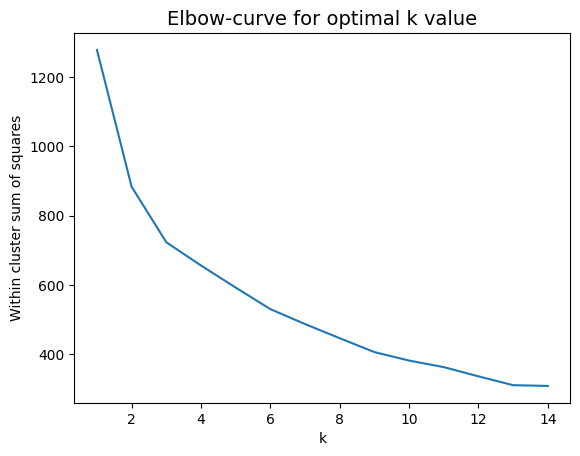

In [48]:
wss = pd.DataFrame(wss, columns = ['k', 'WSS'])

sns.lineplot(x = 'k', y = 'WSS', data = wss)
plt.ylabel('Within cluster sum of squares')
plt.title('Elbow-curve for optimal k value', fontsize = 14)
plt.show()

- At k=3, an elbow shape can be identified. The slope of the curve changes rapidly from k=3. Therefore, k=3 is selected as the optimum value for the number of clusters.

## **Model fitting - using the optimal k value**

In [49]:
kmodel_new = KMeans(n_clusters = 3)

kmodel_new.fit(country_scaled.iloc[:,1:]) # the first column 'country' is left out as Euclidean distance method will not work with string values
pred_labels = kmodel_new.predict(country_scaled.iloc[:,1:])

In [50]:
# Adding the cluster labels column to the original data
country['cluster'] = pred_labels
country.reset_index(drop = True, inplace = True)
display(country.head())

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


The cluster labels are predicted for each country in the scaled data.

# **Exploring the characteristics of each cluster**

In [51]:
display(country.cluster.value_counts())

cluster
0    73
1    41
2    28
Name: count, dtype: int64

- Out of the 142 countries, about 50% are in cluster 0.

### Child mortality and Fertility vs cluster

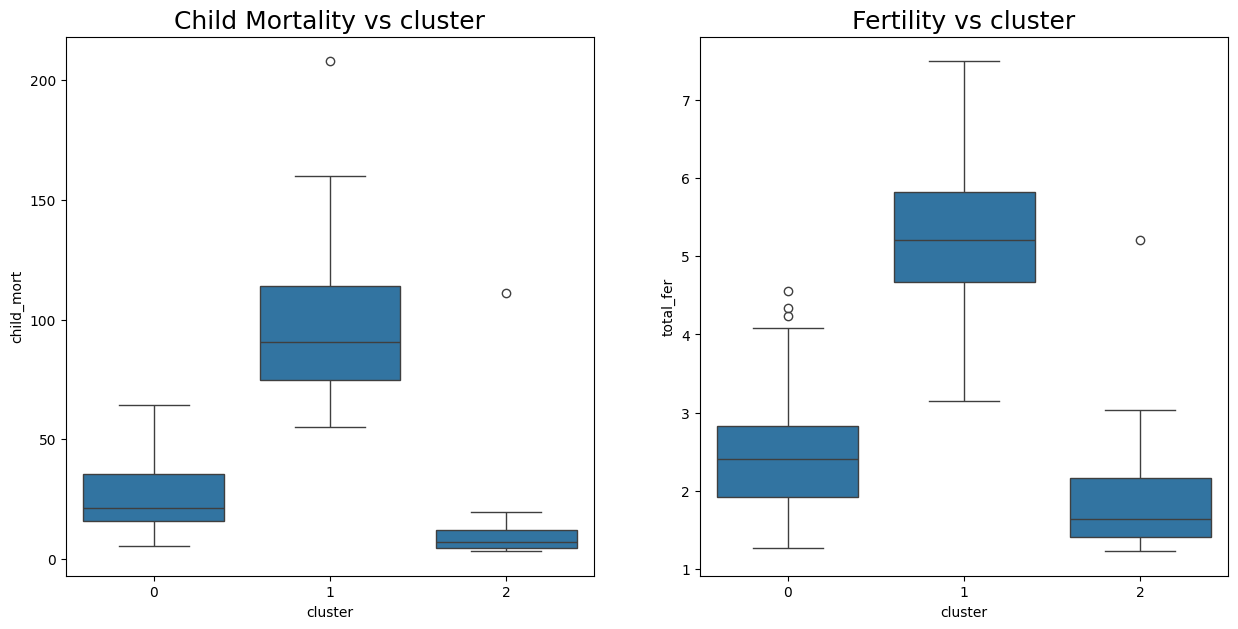

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (15,7))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster', y = 'child_mort', data = country)
plt.title('Child Mortality vs cluster', fontsize = 18)

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster', y = 'total_fer', data = country)
plt.title('Fertility vs cluster', fontsize = 18)
plt.show()

- Cluster 1 has countries with greater child mortality and fertility rates.
- Cluster 2 on the other hand has the lowest average of child mortality and total fertility rates.

### Health expenditure and Life expectancy vs cluster

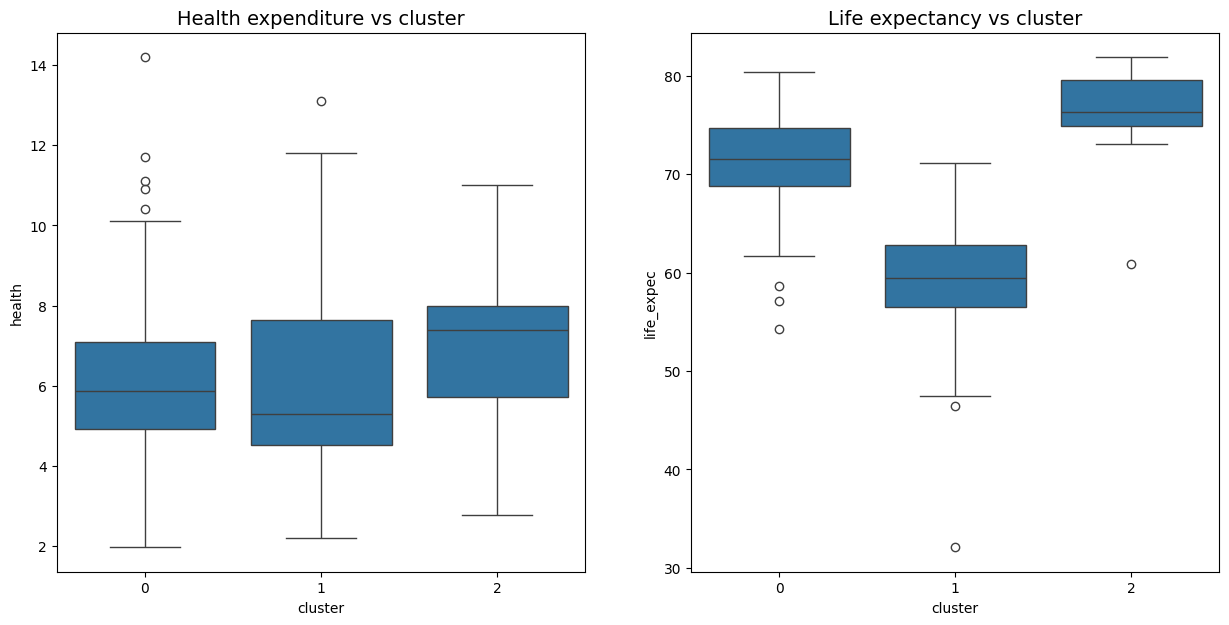

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (15,7))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster', y = 'health', data = country)
plt.title('Health expenditure vs cluster', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster', y = 'life_expec', data = country)
plt.title('Life expectancy vs cluster', fontsize = 14)
plt.show()

- Health expenditure and life expectancy are the lowest in cluster 1.

### Exports and Imports vs cluster

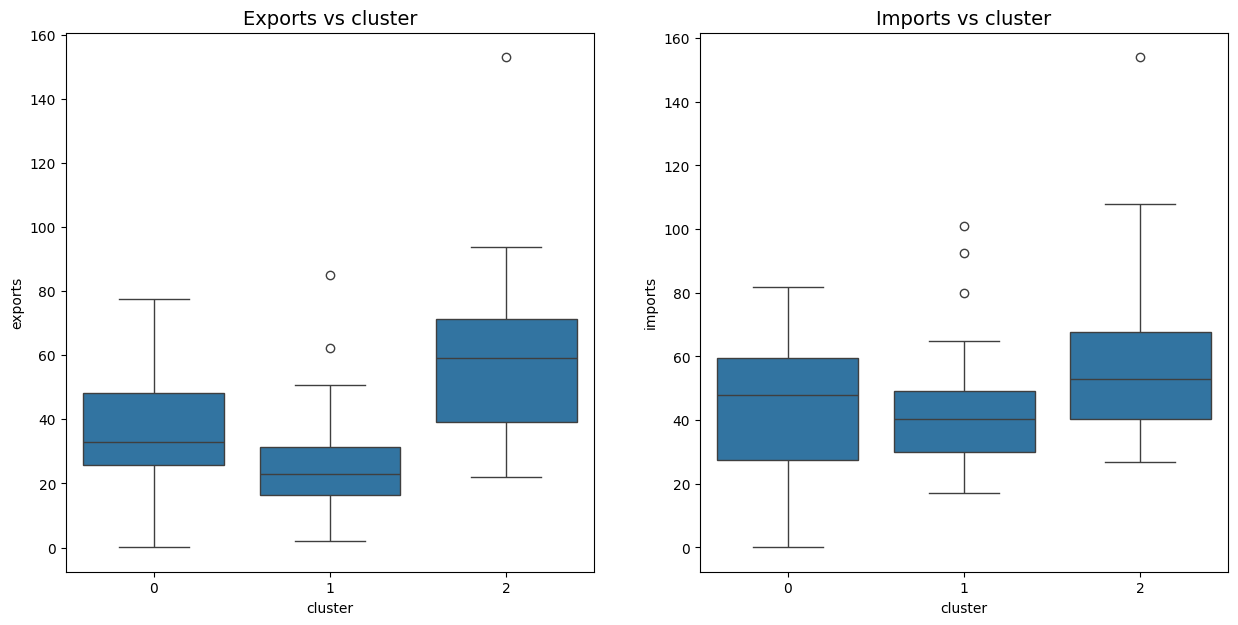

In [54]:
fig, ax = plt.subplots(1, 2, figsize = (15,7))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster', y = 'exports', data = country)
plt.title('Exports vs cluster', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster', y = 'imports', data = country)
plt.title('Imports vs cluster', fontsize = 14)
plt.show()

- Cluster 1 shows lower exports and imports in comparison to the rest of the clusters.

### GDP per capita, Net Income per person and Inflation vs cluster

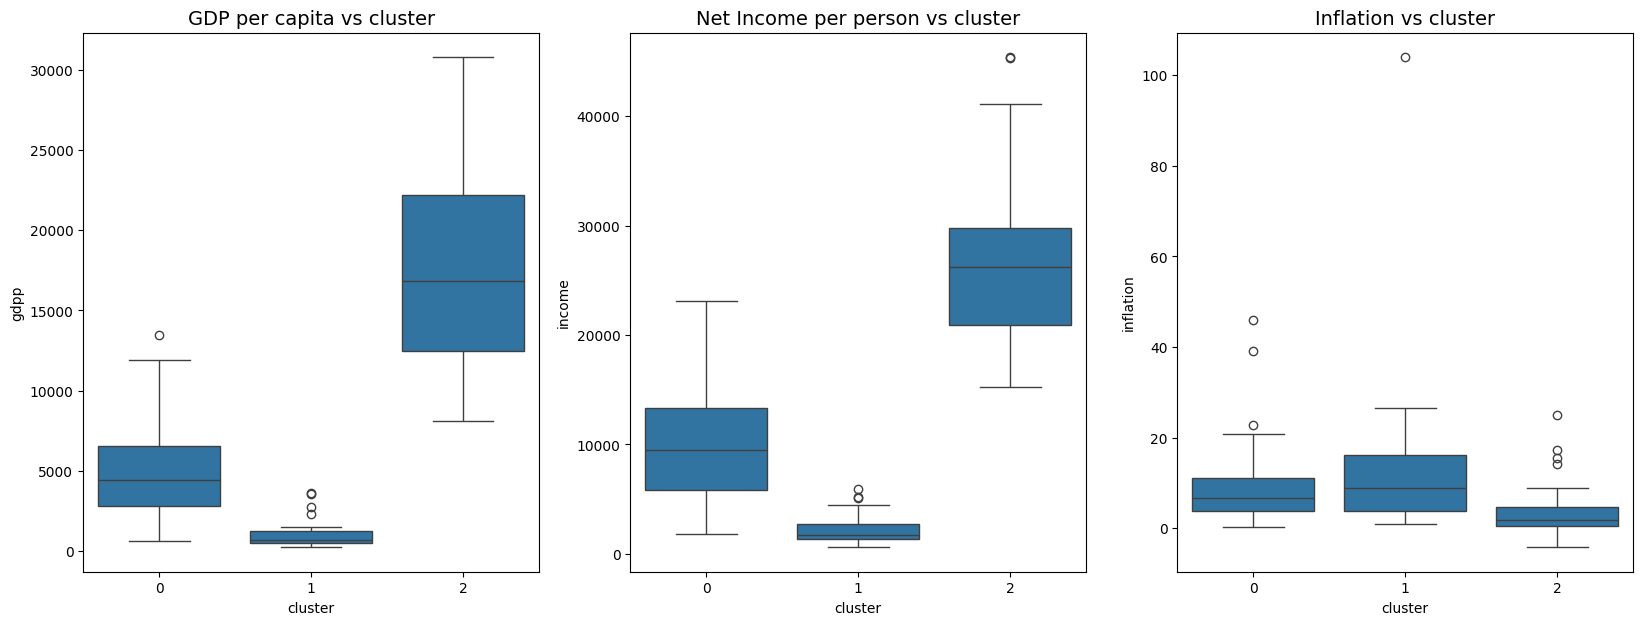

In [55]:
fig, ax = plt.subplots(1, 3, figsize = (20,7))

plt.subplot(1,3,1)
sns.boxplot(x = 'cluster', y = 'gdpp', data = country)
plt.title('GDP per capita vs cluster', fontsize = 14)

plt.subplot(1,3,2)
sns.boxplot(x = 'cluster', y = 'income', data = country)
plt.title('Net Income per person vs cluster', fontsize = 14)

plt.subplot(1,3,3)
sns.boxplot(x = 'cluster', y = 'inflation', data = country)
plt.title('Inflation vs cluster', fontsize = 14)
plt.show()

- The GDP per capita and Net Income per person ranks the lowest in cluster 1, but has the highest Inflation.

### **Creating a table that shows the mean values of all variables for each cluster**

In [56]:
averages_of_all = pd.DataFrame(country.groupby('cluster').agg({'gdpp':'mean', 'income':'mean', 'inflation':'mean', 'exports':'mean', 'imports':'mean',\
                                     'health':'mean', 'child_mort':'mean', 'life_expec':'mean', 'total_fer':'mean'}))

display(averages_of_all.sort_values(by = ['child_mort', 'total_fer', 'health', 'life_expec', 'income'],\
                                    ascending = [False, False, True, True, True]))

,gdpp,income,inflation,exports,imports,health,child_mort,life_expec,total_fer
cluster,,,,,,,,,
1,1004.439024,2188.609756,11.902317,26.029512,42.387805,6.337805,97.448780,59.043902,5.181951
0,4823.041096,9799.041096,8.485055,36.365603,44.881725,6.271644,26.517808,71.338356,2.464247
2,18112.500000,26707.142857,4.062536,59.639286,57.239286,6.947500,11.885714,76.500000,1.957500


We can conclude that Cluster 1 is going to be the target group of countries who require the financial aid.

- Cluster 1 -> Require financial aid
- Cluster 0 -> May require financial aid
- Cluster 2 -> Do not require financial aid

## **Visualizing the countries that need financial aid on a world map**

In [57]:
import plotly.express as px
!pip install -U kaleido
import kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00


In [58]:
country['cluster'].loc[country['cluster'] == 1] = 'Help Needed'
country['cluster'].loc[country['cluster'] == 0] = 'May Need Help'
country['cluster'].loc[country['cluster'] == 2] = 'Help Not Needed'

In [60]:
fig = px.choropleth(country[['country','cluster']],
                    locationmode='country names',
                    locations='country',
                     title='Where to Allocate Resources (World)',
                     color_discrete_sequence=["orange", "red", "green",'black'],color=country['cluster'],
                     color_discrete_map={'Help Needed':'Red',
                                        'May Need Help':'Yellow',
                                        'Help Not Needed':'Green'} )
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text='Labels',legend_title_side='top',title_pad_l=260,title_y=0.86)

#fig.write_html("NeededHelpPerCountry(World)kmeans.html")
#fig.write_image("NeededHelpPerCountry(World)kmeans.png",scale=3)
fig.show(engine='kaleido')

# **Conclusion**

- From the visualization above, we see that majority of the countries needing financial aid are concentrated in Central Africa. There are few countries in Asia/Middle East who also fall in this category.

- Countries like the United States of America, Australia, and the United Kingdom are  greyed out. This could be due to suppressing the outliers in the data.

- The EDA carried showed important insights and trends in the socio-economic factors.

- The problem statement required an Unsupervised Learning Model, and the KMeans Clustering was used. Other clustering techniques like Hierarchical Clustering could also be used, which may give better accuracy.